## 训练模型
线性模型一般可以表示为：  
$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$  
可以简写成：  
$
\hat{y} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \mathbf{x} \cdot \boldsymbol{\theta}
$   
$\theta$ 是所有的参数， x 表示每一个样本的特征向量   

#### MSE 作为损失函数
$
\text{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2}
$     
两种方式去获取最优值：   
1. Normal Equation 正规方程  
$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$   
2. Gradient Descent (GD) 梯度下降  
Batch GD, Mini-batch GD, and Stochastic GD.

正规方程能够快速的得到最优解，但是如果特征值太多，会计算的非常慢。 $(\mathbf{X}^T \mathbf{X})^{-1}$ 的时间复杂度介于 O(n^2.4) 和 O(n^3) 之间

In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

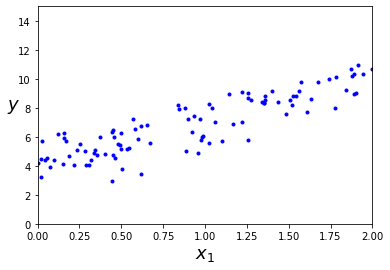

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#### 使用正规方程求最优解  
$\theta_0$的参数是1 所以为每个样本添加上1

In [17]:
X_b = np.c_[np.ones((100, 1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.09732149],
       [3.01689808]])

In [20]:
# 现在使用得到的最优解去预测一下
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
print(X_new_b.shape, theta_best.shape, y_predict.shape)
y_predict

(2, 2) (2, 1) (2, 1)


array([[ 4.09732149],
       [10.13111765]])

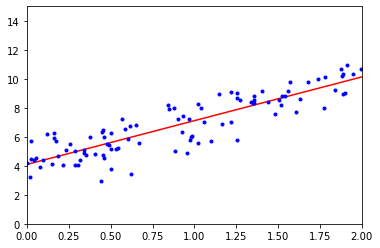

In [21]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [24]:
# 使用 sklearn 的线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.09732149]), array([[3.01689808]]))

In [25]:
lin_reg.predict(X_new)

array([[ 4.09732149],
       [10.13111765]])

最小二乘法Least Squares https://www.jianshu.com/p/56e3683d4474
todo learn SVD

sklearn LinearRegression 基于 SVD 时间复杂度大约是O(n^2)

### Gradient Descent 梯度下降
使用正规方程的方式，如果参数很多的时候或者数据集很大的时候，效率很慢，这时候使用梯度下降会方便多了。   
假设浓雾下，你迷失在了大山中，你只能感受到自己脚下的坡度。为了最快到达山底，一个最好的方法就是沿着坡度最陡的地方下山。这其实就是梯度下降所做的：它计算误差函数关于参数向量$\theta$的局部梯度，同时它沿着梯度下降的方向进行下一次迭代。当梯度值为零的时候，就达到了误差函数最小值 。   
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-3.PNG)   
  
在梯度下降中一个重要的参数是步长，由超参数 *learning rate* 学习率决定。 
#### 学习率过小
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-4.PNG)
#### 学习率过大
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-5.PNG)

#### 问题 
并不是所有的损失函数都是一个规则的碗。假如是下图，如果选择左边它可能只是收敛到左侧的局部最小值。如果选择右边，如果学习率过大，可能会错过最小值。
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-6.PNG)

MSE 是一个凸函数，没有局部最小值，梯度下降可以无限接近全局最小值。（只要你训练时间足够长，同时学习率不是太大 ）。  
损失函数的形状：如果 feature 1 和 feature 2 有相同的数值范围（scale），会得到类似左边的形状。如果 feature 1 和 feature 2 差距太大，会得到右边的形状，右边的形状在进行梯度下降的时候更慢，因为学习率确定及每次步长相等，左边的训练的次数会少于右边。
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-7.PNG)

### 批量梯度下降 Batch Gradient Descent  
由于每次梯度下降是基于整个训练集，所以叫批量梯度下降。
对每个参数$\theta_j$求偏导（partial derivative）  
$
\dfrac{\partial}{\partial \theta_j} \text{MSE}(\boldsymbol{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\boldsymbol{\theta}^T \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}
$   
与单独计算每一个的偏导相比，可以对于它们一起计算出来梯度向量：   
$
\nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\boldsymbol{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\boldsymbol{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\boldsymbol{\theta})
\end{pmatrix}
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

### 学习率  
基于梯度向量，每次迭代可以根据学习率去计算下一个$\theta$的值   
$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta})
$

In [27]:
eta = 0.1 # learning rate
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[4.09207604]
 [3.02173784]]


In [31]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

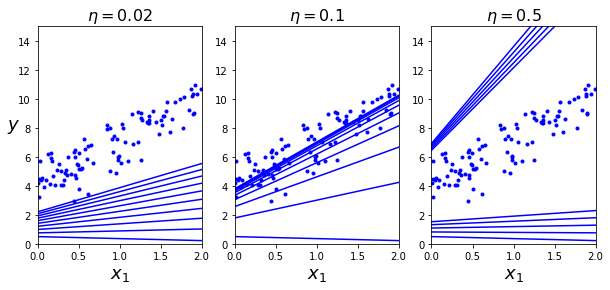

In [32]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

如果损失函数的凸函数并且梯度不会突变，固定学习率之后，收敛速率是O(1/ϵ), ϵ tolerance 容差。有时候我们需要进行相当多的迭代才能到达损失函数最小值，这时候可以设置一个容差，容差范围内我们就认为已经能够满足需求了。这种情况下，如果 ϵ除以10, 训练次数乘以10。

#### 随机梯度下降 Stochastic Gradient Descent
与批量梯度下降每次都使用全数据集进行计算，随机梯度下降每次只是选用一个实例样本机型计算。由于随机选择一个实例样本，所以下降的路线不规则，并且不会在极值点收敛，会在附近震荡。  
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-9.PNG)

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate.  
One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.  
This process is akin to *simulated annealing(模拟退火)* .The function that determines the learning rate at each iteration is called the *learning schedule*.

In [34]:

m = len(X_b)
np.random.seed(42)

# 按照惯例进行 m 轮迭代，每一轮叫做一代 （an epoch）
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.06829197],
       [3.04806189]])

In [39]:
# Stochastic Gradient Descent Regressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(y.shape, y.ravel().shape)
print(sgd_reg.intercept_, sgd_reg.coef_)

(100, 1) (100,)
[4.08265424] [3.00485347]


### Mini-batch Gradient Descent
小批量梯度下降基于一个小的随机的数据子集进行计算。
![image](https://github.com/it-ebooks/hands-on-ml-zh/raw/d6963c5048a1d4b1da9e741c625f7cc2a1400235/images/chapter_4/%E5%9B%BE4-11.PNG)

![image.png](images/mini_batch_comparation.png)

### Polynomial Regression 多项式回归
将每个 feature 进行幂变换，构造成新的训练集，这样就能够拟合非线性数据，这个叫做多项式回归。

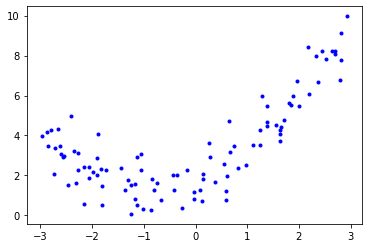

In [45]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
# degree 变换几次幂 n个feature degree=d 将会转换成 (n+d)!/d!n! 个feature
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


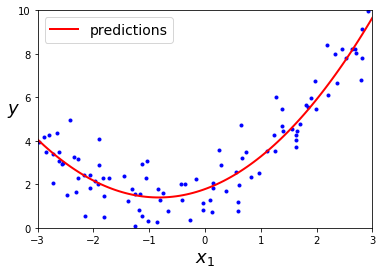

In [50]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 学习曲线

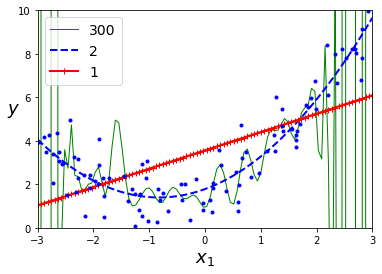

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

高次多项式**过拟合**，线性模型**欠拟合**。   
一种判断方式： 如果model在训练集表现良好，但是在交叉验证很差，一般就会出现过拟合。如果两者都不好，就是欠拟合。  
另一种方式是查看**学习曲线 learning curves**。

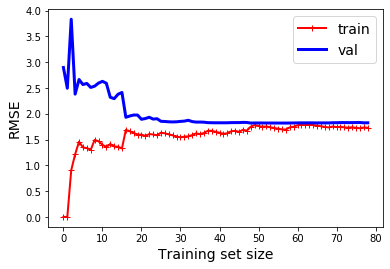

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14) 
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

[0, 80, 0, 3]

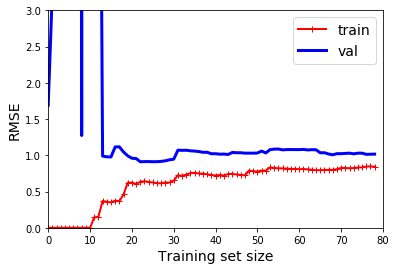

In [75]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3]) 

上面两条线有缝隙，说明在训练集上表现要好于验证集，这个是过拟合模型的一个特征。

### 线性模型的正则化
通过降低参数的权重来实现优化，也可以认为是限制参数

### 岭回归 Ridge Regression
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$   
注意i从1开始


In [81]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

使用正规方程求解  
$
\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}
$

In [82]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [84]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### Lasso 回归 Least Absolute Shrinkage and Selection Operator Regression
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$   
L1范数  
Lasso 回归的一个重要特征是它倾向于完全消除最不重要的特征的权重（即将它们设置为零）   
Lasso 损失函数在 $\theta_i=0(i=1,2,\cdots,n)$  处无法进行微分运算，但是梯度下降如果你使用子梯度向量 $\mathbf{g}$ 后它可以在任何 $\theta_i=0$ 的情况下进行计算。下面公式是在 Lasso 损失函数上进行梯度下降的子梯度向量公式。   
$
g(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}}\, \text{MSE}(\boldsymbol{\theta}) + \alpha
\begin{pmatrix}
  \operatorname{sign}(\theta_1) \\
  \operatorname{sign}(\theta_2) \\
  \vdots \\
  \operatorname{sign}(\theta_n) \\
\end{pmatrix} \quad \text{where } \operatorname{sign}(\theta_i) =
\begin{cases}
-1 & \text{if } \theta_i < 0 \\
0 & \text{if } \theta_i = 0 \\
+1 & \text{if } \theta_i > 0
\end{cases}
$

In [85]:
# 等于 SGDRegressor(penalty="l1")
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net 弹性网络  
$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$   
r=0 -> Ridge Regression r=1 -> Lasso Regression   

一般情况下不建议直接使用线性回归。岭回归是一个很好的选择，如果你怀疑某些特性没用，你应该使用Lasso回归或者弹性网络。

In [86]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping 早期停止法 
对于迭代学习算法，有一种非常特殊的正则化方法，就像梯度下降在验证错误达到最小值时立即停止训练那样。我们称为早期停止法。

In [87]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [88]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

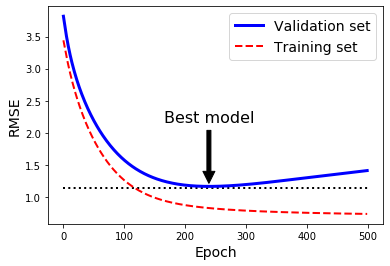

In [90]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

### Logistic Regression 逻辑回归  
$
\hat{p} = h_{\boldsymbol{\theta}}(\mathbf{x}) = \sigma(\boldsymbol{\theta}^T \mathbf{x})
$   
$
\sigma(t) = \dfrac{1}{1 + \exp(-t)}
$

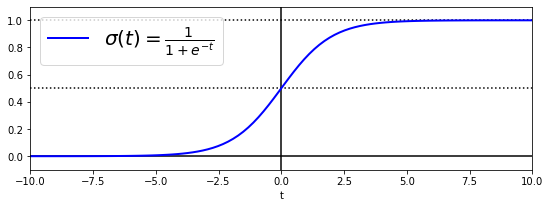

In [93]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$    
σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0,

### Cost function
$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$   
可以写成：   
**Logistic Regression cost function (log loss)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$   

**Logistic cost function partial derivatives**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

### Decision Boundaries
![image.png](images/iris.png)

In [115]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [116]:
import pandas as pd
pd.DataFrame(iris["data"]).head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
pd.DataFrame(X).head(5)

,0
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [118]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

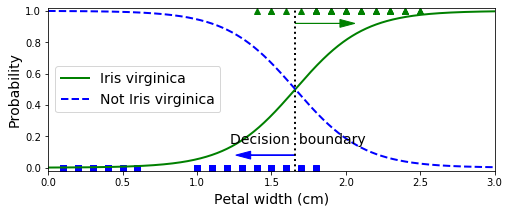

In [119]:
# 注意决策边界 Decision  boundary

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [120]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

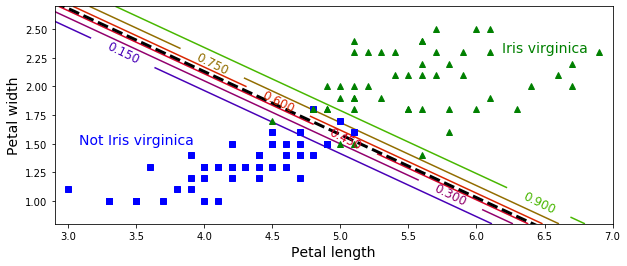

In [121]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax Regression  
Logistic 回归模型可以直接推广到支持多类别分类，不必组合和训练多个二分类器，其称为 Softmax 回归或多类别 Logistic 回归。  
当给定一个实例 \mathbf{x} 时，Softmax 回归模型首先计算 k 类的分数 s_k(\mathbf{x})，然后将分数应用在Softmax 函数（也称为归一化指数）上，估计出每类的概率。

**Softmax score for class k**   

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$   
注意，每个类都有自己独一无二的参数向量 $\theta_k$。 所有这些向量通常作为行放在参数矩阵 $\Theta$ 中。   
一旦你计算了样本 $\mathbf{x}$ 的每一类的得分，你便可以通过Softmax函数估计出样本属于第 k 类的概率 $\hat{p}_k$：通过计算 e 的 $s_k(\mathbf{x})$ 次方，然后对它们进行归一化（除以所有分子的总和）。    
$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$   
* K 表示有多少类
* $\mathbf{s}(\mathbf{x})$ 表示包含样本 $\mathbf{x}$ 每一类得分的向量
* $\sigma{(\mathbf{s}(\mathbf{x}))_k}$ 表示给定每一类分数之后，实例 $\mathbf{x}$ 属于第 k 类的概率    

**Softmax Regression classifier prediction**

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$


### 交叉熵  Cross entropy
交叉熵作为 cost function
**Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$   
**k类交叉熵的梯度向量**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [123]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) # lbfgs 使用L2范数
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

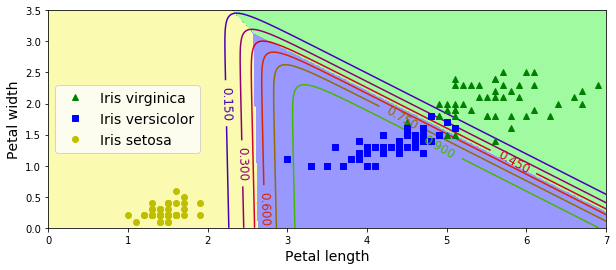

In [124]:

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [125]:
softmax_reg.predict([[5, 2]])

array([2])

In [126]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])